**Import Libraries**

In [1]:
import numpy as np 
import pandas as pd 
import itertools
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_squared_error


**Read the data**

In [2]:
df=pd.read_csv("weather.csv")
df.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100990 entries, 0 to 100989
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   datetime_utc  100990 non-null  object 
 1    _conds       100918 non-null  object 
 2    _dewptm      100369 non-null  float64
 3    _fog         100990 non-null  int64  
 4    _hail        100990 non-null  int64  
 5    _heatindexm  29155 non-null   float64
 6    _hum         100233 non-null  float64
 7    _precipm     0 non-null       float64
 8    _pressurem   100758 non-null  float64
 9    _rain        100990 non-null  int64  
 10   _snow        100990 non-null  int64  
 11   _tempm       100317 non-null  float64
 12   _thunder     100990 non-null  int64  
 13   _tornado     100990 non-null  int64  
 14   _vism        96562 non-null   float64
 15   _wdird       86235 non-null   float64
 16   _wdire       86235 non-null   object 
 17   _wgustm      1072 non-null    float64
 18   _wi

In [4]:
df1=df[["datetime_utc"," _tempm"]]
df1.head()

,datetime_utc,_tempm
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


In [5]:
df1.columns=["date","temp"]
df1.columns

Index(['date', 'temp'], dtype='object')

In [6]:
df1.head()

,date,temp
0,19961101-11:00,30.0
1,19961101-12:00,28.0
2,19961101-13:00,24.0
3,19961101-14:00,24.0
4,19961101-16:00,23.0


In [7]:
df1["date"]=pd.to_datetime(df1["date"],format="%Y%m%d-%H:%M")
df1.dtypes

date    datetime64[ns]
temp           float64
dtype: object

In [8]:
df1=df1.set_index("date")

In [9]:
df1.head()

,temp
date,
1996-11-01 11:00:00,30.0
1996-11-01 12:00:00,28.0
1996-11-01 13:00:00,24.0
1996-11-01 14:00:00,24.0
1996-11-01 16:00:00,23.0


**Visualizing data**

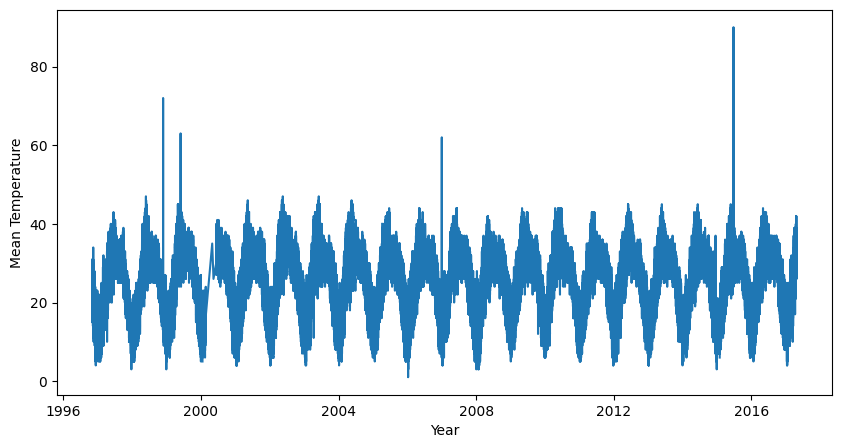

In [10]:
fig=plt.figure(figsize=(10,5))
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.plot(df1)
plt.show()

**Null value**

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 100990 entries, 1996-11-01 11:00:00 to 2017-04-24 18:00:00
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    100317 non-null  float64
dtypes: float64(1)
memory usage: 1.5 MB


In [18]:
daily_mean=df1.groupby(df1.index.day).mean()
monthly_mean=df1.groupby(df1.index.month).mean()
hourly_mean=df1.groupby(df1.index.hour).mean()
yearly_mean=df1.groupby(df1.index.year).mean()


**Plotting.**

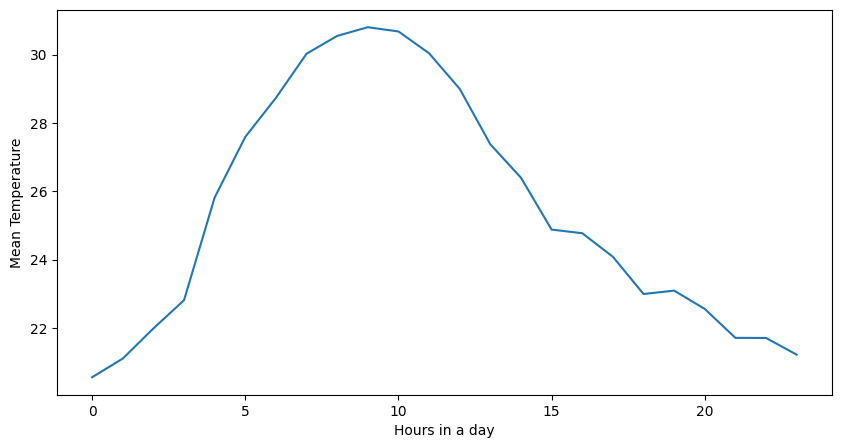

In [21]:
fig=plt.figure(figsize=(10,5))
plt.plot(hourly_mean)
plt.xlabel("Hours in a day")
plt.ylabel("Mean Temperature")
plt.show()

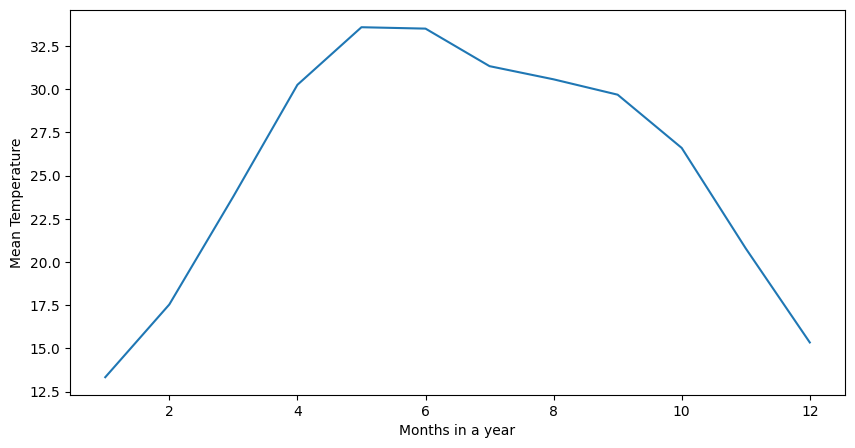

In [22]:
fig=plt.figure(figsize=(10,5))
plt.plot(monthly_mean)
plt.xlabel("Months in a year")
plt.ylabel("Mean Temperature")
plt.show()

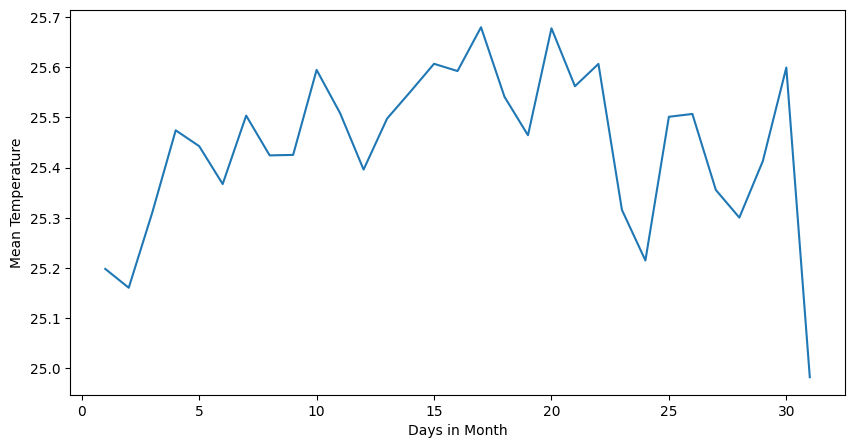

In [23]:
fig=plt.figure(figsize=(10,5))
plt.plot(daily_mean)
plt.xlabel("Days in Month")
plt.ylabel("Mean Temperature")
plt.show()

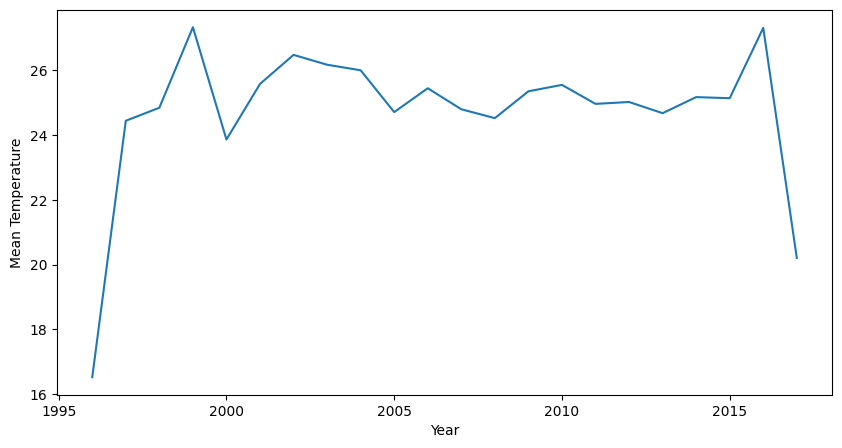

In [25]:
fig=plt.figure(figsize=(10,5))
plt.plot(yearly_mean)
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.show()

# Analysis of Daily Data

In [27]:
daily=df1.resample("D").mean()

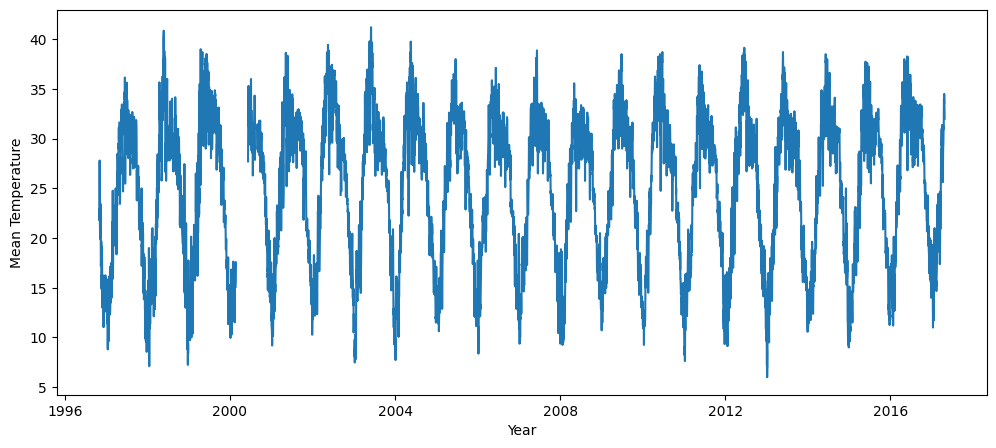

In [29]:
fig=plt.figure(figsize=(12,5))
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.plot(daily)
plt.show()

In [30]:
daily=daily["2001-01-01":]
daily.shape

(5958, 1)

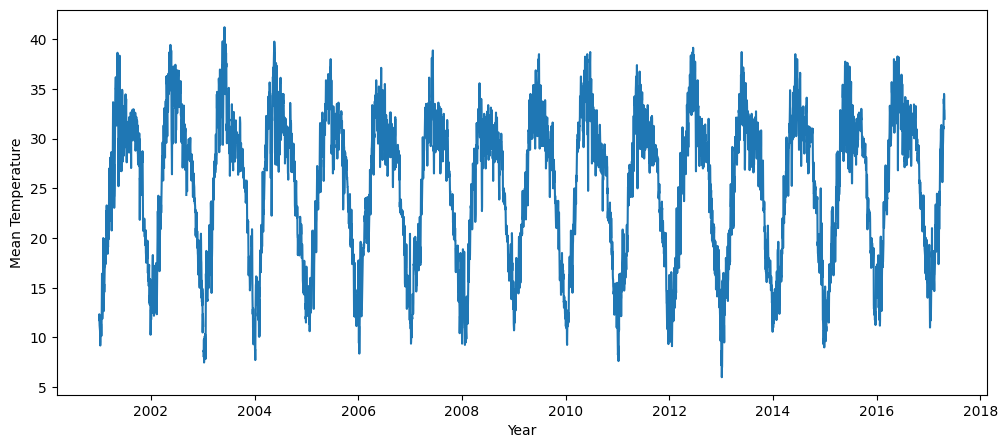

In [31]:
fig=plt.figure(figsize=(12,5))
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.plot(daily)
plt.show()

In [32]:
daily=daily.fillna(method="ffill")

In [33]:
actual=daily["temp"].to_frame().rename(columns={"temp":"actual"})
predicted=daily["temp"].to_frame().shift(1).rename(columns={"temp":"predicted"})

df_daily=pd.concat([actual,predicted],axis=1)

In [34]:
df_daily.head()

,actual,predicted
date,,
2001-01-01,11.750000,NaN
2001-01-02,12.333333,11.750000
2001-01-03,11.666667,12.333333
2001-01-04,11.208333,11.666667
2001-01-05,11.000000,11.208333


In [35]:
df_daily=df_daily[1:]

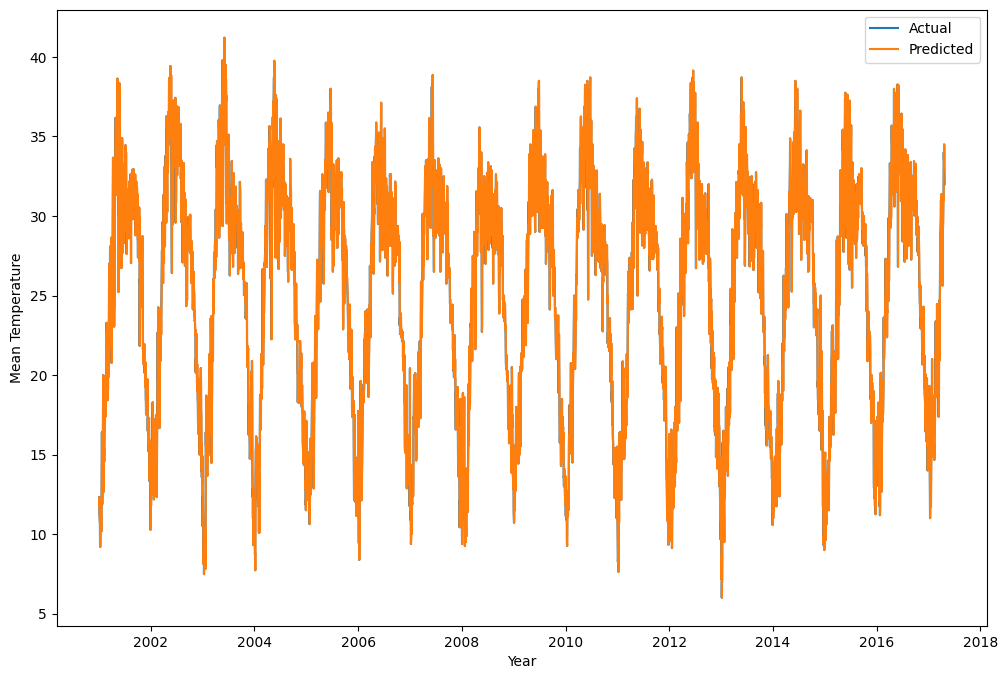

In [38]:
fig=plt.figure(figsize=(12,8))
plt.plot(df_daily["actual"],label="Actual")
plt.plot(df_daily["predicted"],label="Predicted")
plt.xlabel("Year")
plt.ylabel("Mean Temperature")
plt.legend(loc="best")
plt.show()

In [41]:
rmse=mean_squared_error(df_daily["actual"],df_daily["predicted"])
print("RMSE: {:.1f}".format(rmse))

RMSE: 2.6


**Monthly Data**


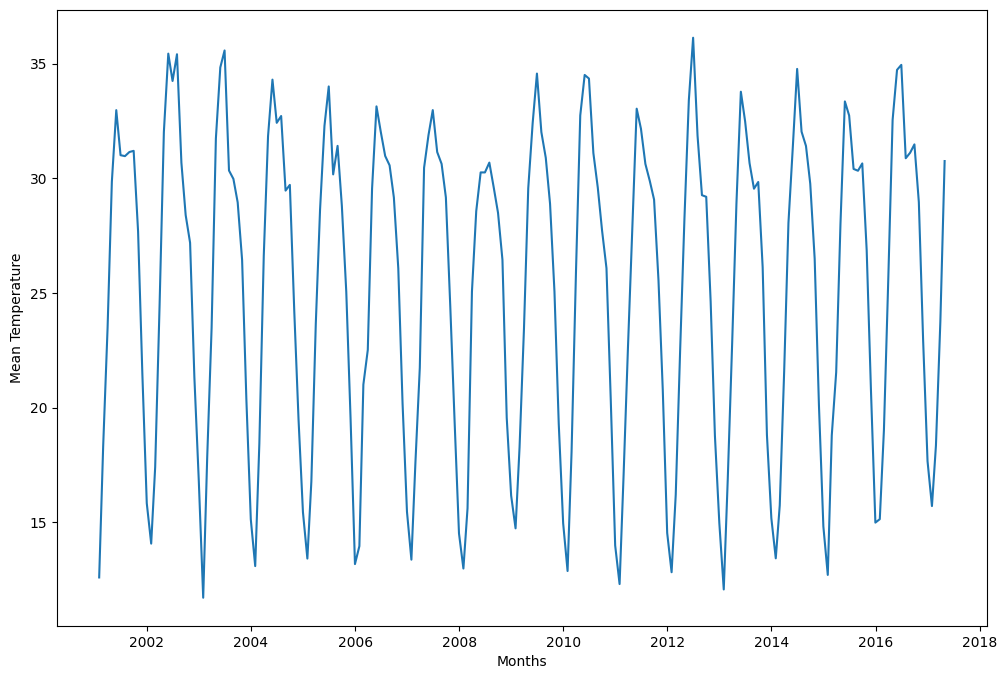

In [43]:
monthly=daily.resample("M").mean()
fig=plt.figure(figsize=(12,8))
plt.plot(monthly)
plt.xlabel("Months")
plt.ylabel("Mean Temperature")
plt.show()

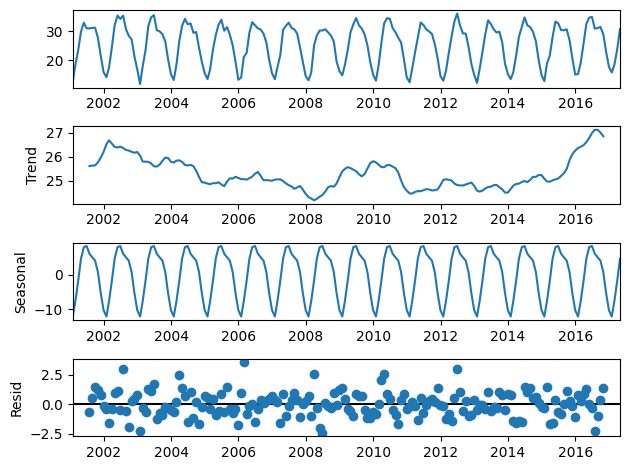

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose
result=seasonal_decompose(monthly)
result.plot()
plt.show()

In [45]:
monthly.head()

,temp
date,
2001-01-31,12.598292
2001-02-28,18.312059
2001-03-31,23.481593
2001-04-30,29.852883
2001-05-31,32.973339


**Checking for stationary**

In [46]:
from statsmodels.tsa.stattools import adfuller

**The function will return the adfuller statistics**


In [49]:
def check_adfuller(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [50]:
check_adfuller(monthly)

ADF Test Statistic : -1.4573021068379481
p-value : 0.5545178229366772
#Lags Used : 11
Number of Observations Used : 184
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


**Making stationary**

In [51]:
monthly["Seasonal Diff"]=monthly["temp"]-monthly["temp"].shift(12)

In [52]:
check_adfuller(monthly["Seasonal Diff"].dropna())

ADF Test Statistic : -4.349404196908064
p-value : 0.00036439290613111334
#Lags Used : 12
Number of Observations Used : 171
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


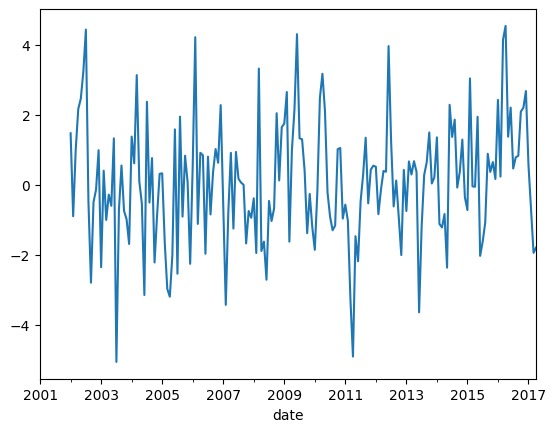

In [53]:
monthly["Seasonal Diff"].plot()
plt.show()

In [54]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

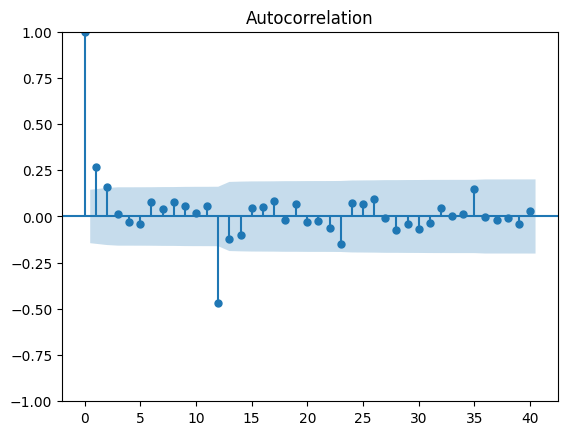

In [55]:
plot_acf(monthly["Seasonal Diff"].dropna(),lags=40)
plt.show()

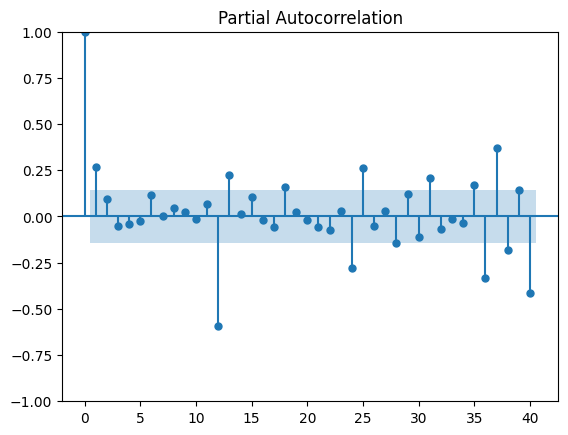

In [56]:
plot_pacf(monthly["Seasonal Diff"].dropna(),lags=40)
plt.show()

**Splitting Data**

In [57]:
train=monthly["temp"][:"2015-01-01"].to_frame()
test=monthly["temp"]["2015-01-01":].to_frame()

train.shape,test.shape

((168, 1), (28, 1))

# SARIMAX

In [58]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [59]:
p=d=q=range(0,2)

pdq=list(itertools.product(p,d,q))
seasonal_pdq=[(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

In [42]:
for pdq_params in pdq:
    for seasonal_params in seasonal_pdq:
        try:
            model=SARIMAX(train,
                          order=pdq_params,
                          seasonal_order=seasonal_params
                         )
            result=model.fit()
            print("SARIMAX({}x{}12)-AIC:{}".format(pdq_params,
                                                   seasonal_params,
                                                   result.aic
                                                  ))
            
        except:
            continue

SARIMAX((0, 0, 0)x(0, 0, 0, 12)12)-AIC:1575.3656636797043
SARIMAX((0, 0, 0)x(0, 0, 1, 12)12)-AIC:1390.5375259183038
SARIMAX((0, 0, 0)x(0, 1, 0, 12)12)-AIC:610.9787293772406
SARIMAX((0, 0, 0)x(0, 1, 1, 12)12)-AIC:540.1788691243188
SARIMAX((0, 0, 0)x(1, 0, 0, 12)12)-AIC:725.2412610471342
SARIMAX((0, 0, 0)x(1, 0, 1, 12)12)-AIC:657.1587420251881
SARIMAX((0, 0, 0)x(1, 1, 0, 12)12)-AIC:563.3856950587447
SARIMAX((0, 0, 0)x(1, 1, 1, 12)12)-AIC:541.7859173711315
SARIMAX((0, 0, 1)x(0, 0, 0, 12)12)-AIC:1364.0946495479734
SARIMAX((0, 0, 1)x(0, 0, 1, 12)12)-AIC:1207.7165381807129
SARIMAX((0, 0, 1)x(0, 1, 0, 12)12)-AIC:606.6210148866473
SARIMAX((0, 0, 1)x(0, 1, 1, 12)12)-AIC:526.6382578383277
SARIMAX((0, 0, 1)x(1, 0, 0, 12)12)-AIC:716.3946054159064
SARIMAX((0, 0, 1)x(1, 0, 1, 12)12)-AIC:638.7081361985144
SARIMAX((0, 0, 1)x(1, 1, 0, 12)12)-AIC:553.754659378486
SARIMAX((0, 0, 1)x(1, 1, 1, 12)12)-AIC:527.0513181140246
SARIMAX((0, 1, 0)x(0, 0, 0, 12)12)-AIC:952.5233359178923
SARIMAX((0, 1, 0)x(0, 0, 1, 

/opt/conda/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


SARIMAX((1, 1, 1)x(1, 0, 1, 12)12)-AIC:597.5443949791199
SARIMAX((1, 1, 1)x(1, 1, 0, 12)12)-AIC:555.7807273584892
SARIMAX((1, 1, 1)x(1, 1, 1, 12)12)-AIC:524.6418270676417


In [60]:
model=SARIMAX(train,
              order=(1,0,0),
              seasonal_order=(0,1,1,12)
             ).fit()

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.62145D+00    |proj g|=  2.26902D-01

At iterate    5    f=  1.54053D+00    |proj g|=  1.94343D-02

At iterate   10    f=  1.53834D+00    |proj g|=  6.24332D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     17      1     0     0   1.577D-05   1.538D+00
  F =   1.5383225855692242     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [61]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 temp   No. Observations:                  168
Model:             SARIMAX(1, 0, 0)x(0, 1, [1], 12)   Log Likelihood                -258.438
Date:                              Sat, 22 Jul 2023   AIC                            522.876
Time:                                      19:25:33   BIC                            532.026
Sample:                                  01-31-2001   HQIC                           526.593
                                       - 12-31-2014                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3473      0.065      5.308      0.000       0.219       0.476
ma.S.L12      -0.9045      0.145     -6.253      0.000      -1.188      -0.621
sigma2         1.4166      0.211      6.728      0.000       1.004       1.829
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                 1.01
Prob(Q):                              0.51   Prob(JB):                         0.60
Heteroskedasticity (H):               0.52   Skew:                             0.19
Prob(H) (two-sided):                  0.02   Kurtosis:                         3.14
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Predict the test data**

In [63]:
predict=model.get_prediction(start=len(train),
                             end=(len(train)+len(test)-1)
                            )

In [64]:
predict_values=predict.predicted_mean

,lower temp,upper temp
2015-01-31,10.655942,15.349419
2015-02-28,14.835497,19.803279
2015-03-31,20.908592,25.908448
2015-04-30,27.132449,32.136160
2015-05-31,30.525536,35.529711


**Our Prediction is working well as of now and giving us good results on Test data**

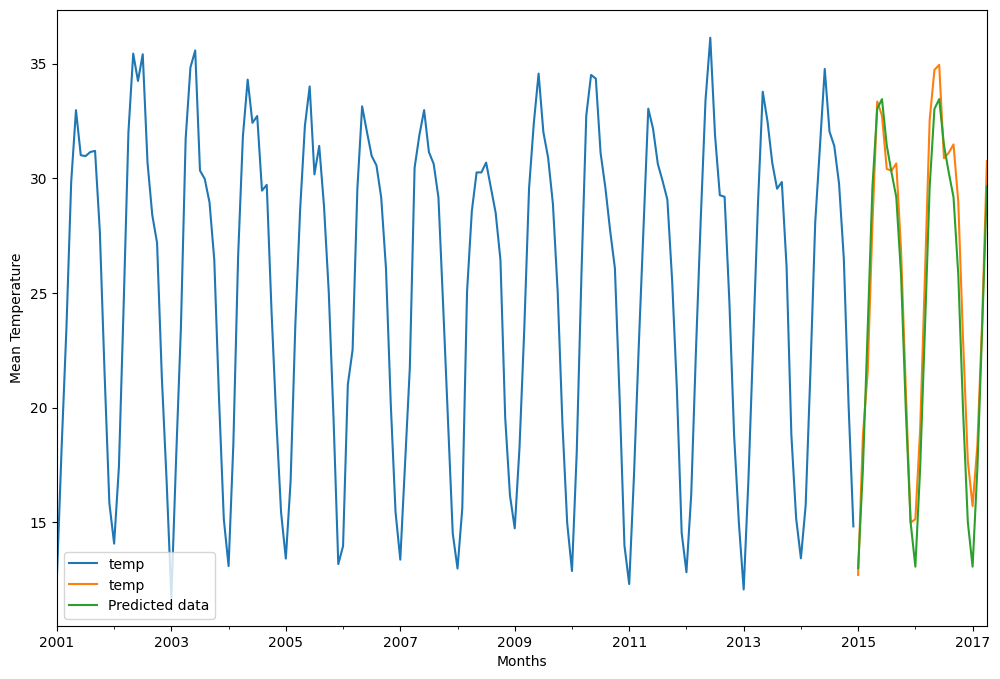

In [71]:
ax=train.plot(label="Training Data",figsize=(12,8))
test.plot(label="Testing Data",ax=ax)
predict_values.plot(label="Predicted data",ax=ax)
plt.xlabel("Months")
plt.ylabel("Mean Temperature")
plt.legend(loc="best")
plt.show()

In [72]:
rmse=mean_squared_error(test["temp"].values,predict_values,squared=False)
rmse

1.71553301440337

In [73]:
test.tail()

,temp
date,
2016-12-31,17.672565
2017-01-31,15.710873
2017-02-28,18.349981
2017-03-31,23.753760
2017-04-30,30.753663


In [74]:
dates_to_predict=pd.date_range(start="2017-04-30",end="2021-12-31",freq="M")
len(dates_to_predict)

57

In [75]:
new_predict=model.get_prediction(start=len(monthly),
                                 end=(len(monthly)+len(dates_to_predict)-1)
                                )

In [76]:
new_predict_values=new_predict.predicted_mean

**The new predicted Monthly average Temperature**

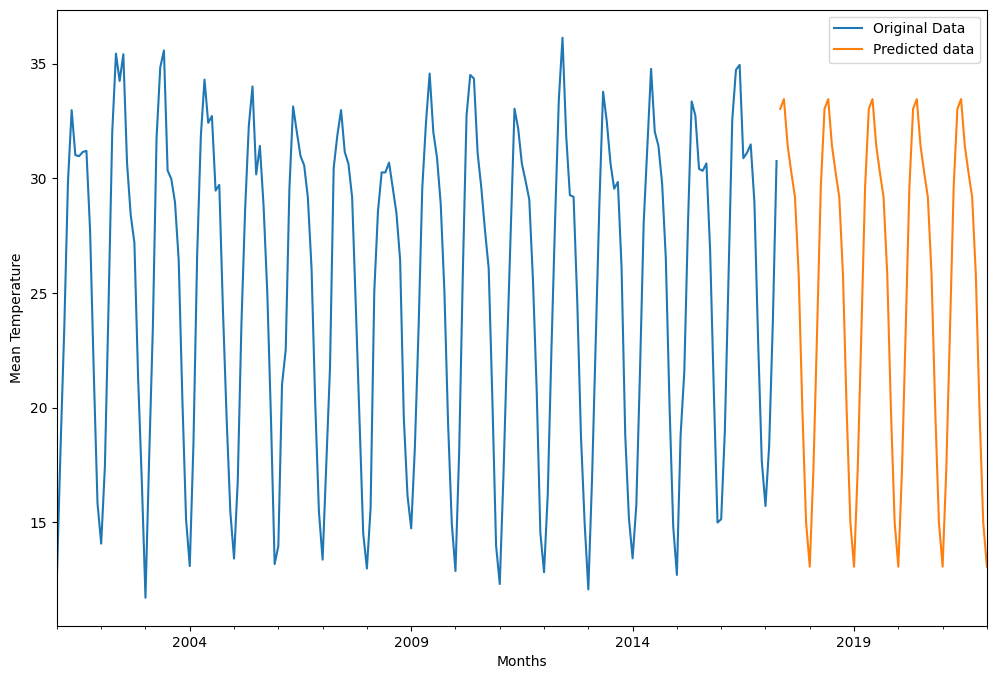

In [77]:
ax=monthly["temp"].plot(label="Original Data",figsize=(12,8))
new_predict_values.plot(label="Predicted data",ax=ax)
plt.xlabel("Months")
plt.ylabel("Mean Temperature",)
plt.legend(loc="best")
plt.show()

# Neural Networks(LSTM)

In [78]:
from sklearn.preprocessing import MinMaxScaler

**tranform the temperatures in bw 0-1**

In [79]:
scaler=MinMaxScaler()
train_scale=scaler.fit_transform(train)
test_scale=scaler.transform(test)

In [80]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

2023-07-22 19:31:14.717937: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [81]:
time_step=12
generator=TimeseriesGenerator(data=train_scale,
                              targets=train_scale,
                              length=time_step,
                              batch_size=1
                             )

In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense,Dropout
from tensorflow.keras.optimizers import Adam

In [83]:
model=Sequential()

2023-07-22 19:31:56.197585: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [84]:
model.add(LSTM(100,activation="relu",input_shape=(time_step,1),return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(64,activation="relu"))
model.add(Dropout(0.01))

model.add(Dense(32))

model.add(Dense(1))
model.compile(optimizer=Adam(learning_rate=0.001),
              loss="mean_squared_error",
              metrics=["mse"]
             )

In [85]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 12, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                42240     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 85,153
Trainable params: 85,153
Non-traina

**fit model with training data**

In [87]:
model.fit(generator,epochs=200,steps_per_epoch=3,verbose=False)

**Visualizing loss per epoch, the loss is varying overtime but decreases significantly with increase in epoch**

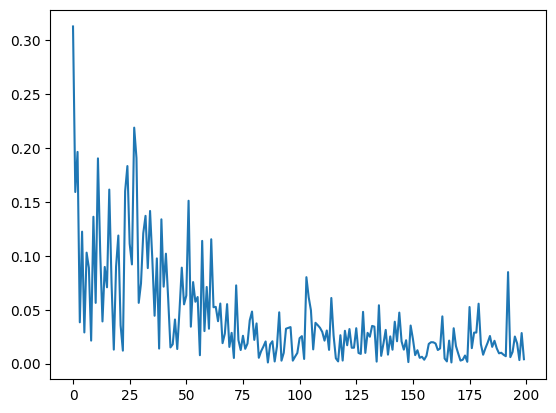

In [88]:
loss_per_epoch=model.history.history["loss"]
plt.plot(loss_per_epoch)
plt.show()

In [89]:
test_pred=[]

test_batch=train_scale[-time_step:]
current_batch=test_batch.reshape(1,time_step,1)

for i in range(len(test)):
    pred=model.predict(current_batch)[0]
    test_pred.append(pred)
    
    current_batch=np.append(current_batch[:,1:,:],[[pred]],axis=1)

1/1 [==============================] - 0s 28ms/step


In [90]:
test_pred

[array([0.15160938], dtype=float32),
 array([0.2676789], dtype=float32),
 array([0.44378263], dtype=float32),
 array([0.6152519], dtype=float32),
 array([0.73614883], dtype=float32),
 array([0.785885], dtype=float32),
 array([0.78134143], dtype=float32),
 array([0.7535128], dtype=float32),
 array([0.6719799], dtype=float32),
 array([0.52686185], dtype=float32),
 array([0.28323525], dtype=float32),
 array([0.1363663], dtype=float32),
 array([0.17073104], dtype=float32),
 array([0.29265323], dtype=float32),
 array([0.4408842], dtype=float32),
 array([0.58391035], dtype=float32),
 array([0.6891249], dtype=float32),
 array([0.74562746], dtype=float32),
 array([0.76063186], dtype=float32),
 array([0.72480506], dtype=float32),
 array([0.63622445], dtype=float32),
 array([0.49715865], dtype=float32),
 array([0.2591989], dtype=float32),
 array([0.15088524], dtype=float32),
 array([0.18341573], dtype=float32),
 array([0.29984754], dtype=float32),
 array([0.4368636], dtype=float32),
 array([0.57

In [91]:
true_pred=scaler.inverse_transform(test_pred)

In [92]:
test["pred"]=true_pred

In [93]:
rmse=mean_squared_error(test["temp"],true_pred,squared=False)
rmse

3.0848863896496743

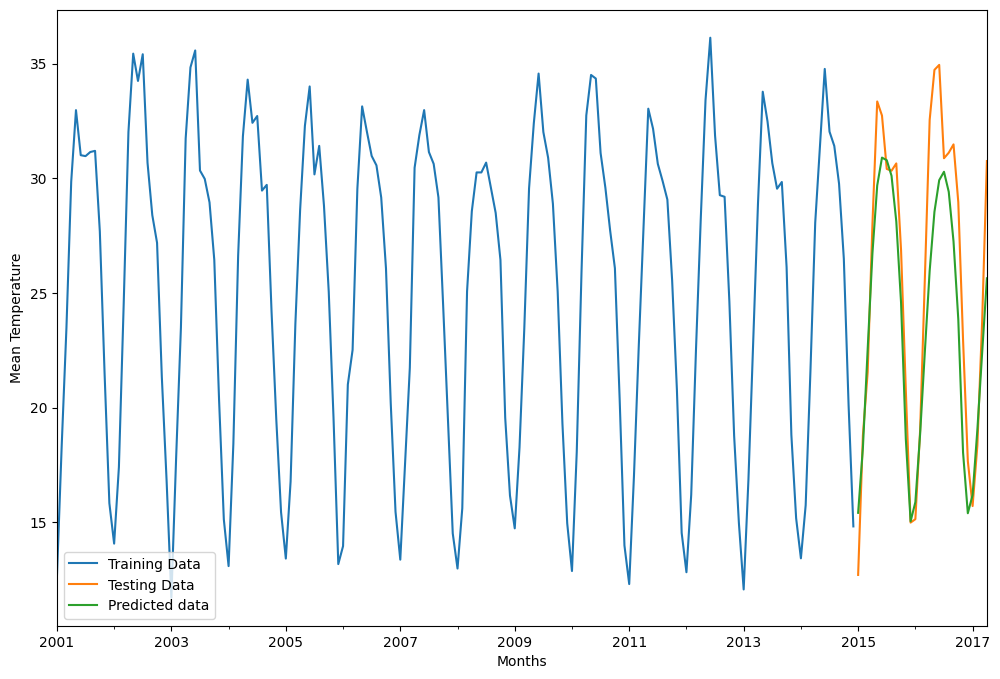

In [94]:
ax=train["temp"].plot(label="Training Data",figsize=(12,8))
test["temp"].plot(label="Testing Data")
test["pred"].plot(label="Predicted data",ax=ax)
plt.xlabel("Months")
plt.ylabel("Mean Temperature")
plt.legend(loc="best")
plt.show()